In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('dataset.csv')

 Drop first column as it is an index

In [3]:
df = df[['feature-0','feature-1','feature-2','feature-3','feature-4','y']]
df_withOutliers = df

Initial descriptive analysis of dataset

In [4]:
df.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,y
count,996.000000,996.000000,993.000000,996.000000,994.000000,1000.000000
mean,-0.566818,7.344365,0.978271,20.075027,9.685750,0.511000
std,71.121217,70.572299,55.022106,93.623887,63.033193,0.500129
min,-8.144376,-0.983165,-2.187062,9.834473,1.234882,0.000000
25%,-6.850499,0.597205,-2.117805,10.503616,3.575566,0.000000
50%,-5.542153,2.370609,-2.050506,11.191897,5.589747,1.000000
75%,-4.341888,4.031264,-1.979004,11.771228,7.881008,1.000000
max,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000


Plot a histogram of rows with values for feature-0

(array([ 991.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    5.]),
 array([   -8.14437557,    92.67006199,   193.48449954,   294.2989371 ,
          395.11337466,   495.92781221,   596.74224977,   697.55668733,
          798.37112489,   899.18556244,  1000.        ]),
 <a list of 10 Patch objects>)

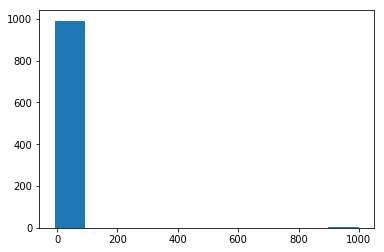

In [5]:
plt.hist(df['feature-0'][np.isfinite(df['feature-0'])])

Remove row with outlier for `feature-0` - keep rows with null values

In [6]:
df = df[(df['feature-0'] < 1000) | df['feature-0'].isnull()]

Re-run histogram of `feature-0`. Data looks evenly distributed

(array([  86.,  105.,   95.,   98.,   94.,  103.,  107.,   94.,  111.,   98.]),
 array([-8.14437557, -7.64740555, -7.15043553, -6.6534655 , -6.15649548,
        -5.65952546, -5.16255543, -4.66558541, -4.16861539, -3.67164537,
        -3.17467534]),
 <a list of 10 Patch objects>)

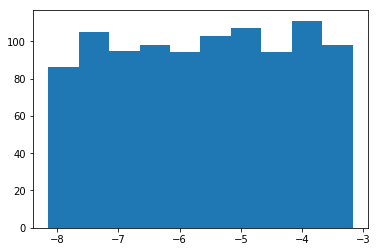

In [7]:
plt.hist(df['feature-0'][np.isfinite(df['feature-0'])])

Plot a histogram of rows with values for feature-1

(array([ 986.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    5.]),
 array([ -9.83164699e-01,   9.91151518e+01,   1.99213468e+02,
          2.99311785e+02,   3.99410101e+02,   4.99508418e+02,
          5.99606734e+02,   6.99705051e+02,   7.99803367e+02,
          8.99901684e+02,   1.00000000e+03]),
 <a list of 10 Patch objects>)

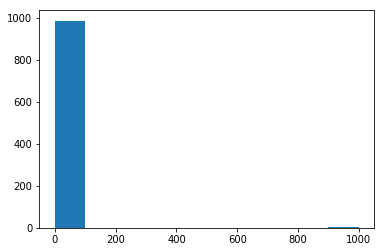

In [8]:
plt.hist(df['feature-1'][np.isfinite(df['feature-1'])])

Remove rows with outliers for `feature-1` - keep rows with null values

In [9]:
df = df[(df['feature-1'] < 1000) | df['feature-1'].isnull()]

Re-run histogram of feature-1. Data looks evenly distributed

(array([ 107.,  102.,  117.,   78.,   93.,  106.,   89.,   97.,   92.,  105.]),
 array([-0.9831647, -0.3096885,  0.3637877,  1.0372639,  1.7107401,
         2.3842163,  3.0576925,  3.7311687,  4.4046449,  5.0781211,
         5.7515973]),
 <a list of 10 Patch objects>)

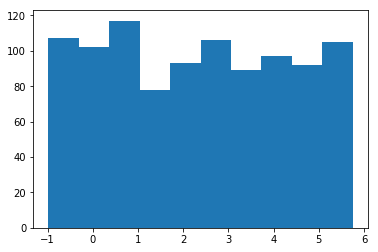

In [10]:
plt.hist(df['feature-1'][np.isfinite(df['feature-1'])])

Plot a histogram of rows with values for feature-2

(array([ 980.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([   -2.18706158,    98.03164458,   198.25035073,   298.46905689,
          398.68776305,   498.90646921,   599.12517537,   699.34388153,
          799.56258768,   899.78129384,  1000.        ]),
 <a list of 10 Patch objects>)

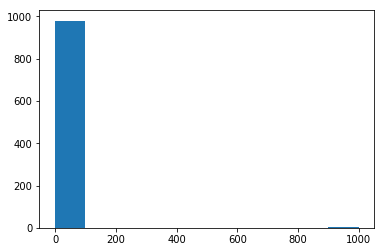

In [11]:
plt.hist(df['feature-2'][np.isfinite(df['feature-2'])])

Remove rows with outliers for feature-2 - keep rows with null values

In [12]:
df = df[(df['feature-2'] < 1000) | df['feature-2'].isnull()]

Re-run histogram of feature-2. Data looks evenly distributed

(array([  94.,  110.,   90.,   96.,  115.,  100.,   98.,   95.,   79.,  103.]),
 array([-2.18706158, -2.15916605, -2.13127052, -2.10337498, -2.07547945,
        -2.04758392, -2.01968838, -1.99179285, -1.96389732, -1.93600178,
        -1.90810625]),
 <a list of 10 Patch objects>)

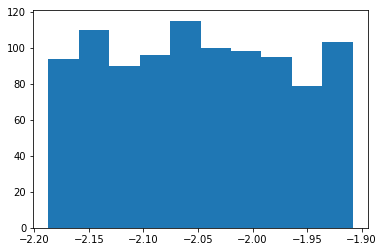

In [13]:
plt.hist(df['feature-2'][np.isfinite(df['feature-2'])])

Plot a histogram of rows with values for feature-3

(array([ 974.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    9.]),
 array([    9.83447288,   108.85102559,   207.86757831,   306.88413102,
          405.90068373,   504.91723644,   603.93378915,   702.95034186,
          801.96689458,   900.98344729,  1000.        ]),
 <a list of 10 Patch objects>)

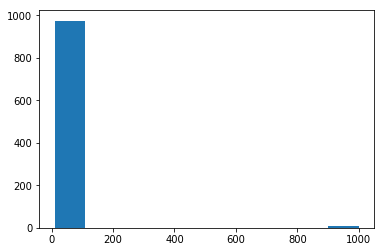

In [14]:
plt.hist(df['feature-3'][np.isfinite(df['feature-3'])])

Remove rows with outliers for `feature-3` - keep rows with null values

In [15]:
df = df[(df['feature-3'] < 1000) | df['feature-3'].isnull()]

Re-run histogram of feature-3. Data looks evenly distributed

(array([  90.,   90.,   92.,   89.,  104.,   87.,  102.,  117.,  105.,   98.]),
 array([  9.83447288,  10.08726442,  10.34005596,  10.5928475 ,
         10.84563903,  11.09843057,  11.35122211,  11.60401365,
         11.85680518,  12.10959672,  12.36238826]),
 <a list of 10 Patch objects>)

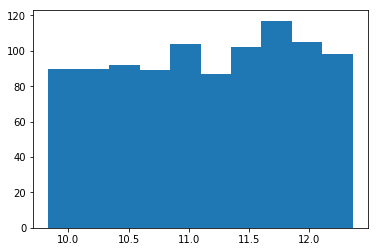

In [16]:
plt.hist(df['feature-3'][np.isfinite(df['feature-3'])])

Plot a histogram of rows with values for `feature-4`

(array([ 968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    4.]),
 array([    1.23488197,   101.11139377,   200.98790558,   300.86441738,
          400.74092918,   500.61744099,   600.49395279,   700.37046459,
          800.24697639,   900.1234882 ,  1000.        ]),
 <a list of 10 Patch objects>)

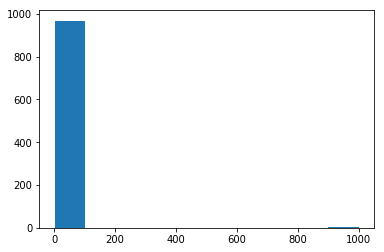

In [17]:
plt.hist(df['feature-4'][np.isfinite(df['feature-4'])])

Remove rows with outliers for `feature-4` - keep records with null values

In [18]:
df = df[(df['feature-4'] < 1000) | df['feature-4'].isnull()]

Re-run histogram of feature-4. Data looks evenly distributed

(array([ 100.,   80.,  109.,  113.,   93.,   87.,   99.,   85.,  104.,   98.]),
 array([  1.23488197,   2.13014516,   3.02540836,   3.92067155,
          4.81593474,   5.71119794,   6.60646113,   7.50172432,
          8.39698752,   9.29225071,  10.18751391]),
 <a list of 10 Patch objects>)

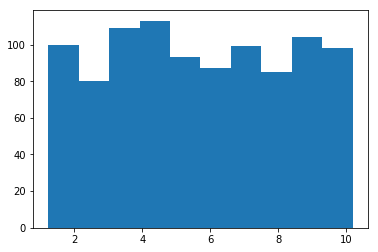

In [19]:
plt.hist(df['feature-4'][np.isfinite(df['feature-4'])])

Now that outliers are removed, run another descriptive analysis of dataset, including mean and standard deviation:

In [20]:
df.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,y
count,970.000000,970.000000,967.000000,970.000000,968.000000,974.000000
mean,-5.612823,2.342179,-2.049468,11.141586,5.701654,0.508214
std,1.424401,1.973795,0.079904,0.726196,2.586646,0.500189
min,-8.144376,-0.983165,-2.187062,9.834473,1.234882,0.000000
25%,-6.855434,0.616699,-2.118199,10.503131,3.577614,0.000000
50%,-5.562233,2.370609,-2.051678,11.167278,5.582865,1.000000
75%,-4.354419,4.011873,-1.979930,11.745840,7.875758,1.000000
max,-3.174675,5.751597,-1.908106,12.362388,10.187514,1.000000


Table of correlations between the features in the dataset:

In [21]:
df[['feature-0','feature-1','feature-2','feature-3','feature-4']].corr()

,feature-0,feature-1,feature-2,feature-3,feature-4
feature-0,1.000000,0.014904,0.007655,0.043939,0.040999
feature-1,0.014904,1.000000,0.010076,0.009714,-0.013545
feature-2,0.007655,0.010076,1.000000,0.019842,-0.061590
feature-3,0.043939,0.009714,0.019842,1.000000,0.011401
feature-4,0.040999,-0.013545,-0.061590,0.011401,1.000000


Since correlation values range from -1 to 1, with -1 representing a strong negative correlation, 1 representing a strong positive correlation, and 0 representing no correlation, the fact that most of these correlation values are < 0.1 away from 0 indicates that the correlations between the features in the dataset are small (or weak). This implies that the values of the features are relatively independent from each other.

Shuffle dataset, then split dataset into training and testing sets (~50% each):

In [22]:
df = df.sample(frac=1)

df_train, df_test = df.iloc[:490], df.iloc[490:]
print len(df_train), len(df_test)

X_train, y_train = df_train[df_train.columns.drop('y')], df_train['y']
X_test, y_test = df_test[df_test.columns.drop('y')], df_test['y']

490 484


Build a pipeline to process the dataset, build a model, and predict values:

In [23]:
knn_pipeline = Pipeline([
    ('my_imputer', Imputer()),
    ('my_std_scaler', StandardScaler()),
    ('masteralg', KNeighborsClassifier())    
])

Process dataset (imputing missing values and normalizing features), then run KNeighborsClassifier fit/predict

In [24]:
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

Print Confusion Matrix for predicted Y values:

In [25]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[219,  25],
       [ 24, 216]], dtype=int64)

Exract true negative (tn), false positive (fp), false negative (fn), and true positive (tp) counts

In [26]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()

Calculate additional metrics based on confusion matrix

In [27]:
num_predicted_correctly = tn + tp
tpr = float(tp)/(tp+fn) # precision / true positive rate
tnr = float(tn)/(tn+fp) # true negative rate
ppv = float(tp)/(tp+fp) # recall / positive predictive value
npv = float(tn)/(tn+fn) # negative predictive value

In [28]:
# f1 = 2.0/(1.0/ppv+1.0/tpr)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

Create a simple dataframe to hold and display metrics, then load the metrics for this execution

In [29]:
metrics_df = pd.DataFrame(index=np.arange(0, 3), columns=['Technique', '% Predicted Correctly', '% of True Positives', '% of True Negatives', '% of False Positives', '% of False Negatives' , 'F1 Score'])
metrics_df.loc[0] = ['KNN - Outliers Removed', num_predicted_correctly, tp, tn, fp, fn, f1]
metrics_df

,Technique,% Predicted Correctly,% of True Positives,% of True Negatives,% of False Positives,% of False Negatives,F1 Score
0,KNN - Outliers Removed,435,216,219,25,24,0.898129
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prepare the datasets for predicting using logistic regression

In [30]:
df = df.sample(frac=1)
df_train, df_test = df.iloc[:490], df.iloc[490:]

X_train, y_train = df_train[df_train.columns.drop('y')], df_train['y']
X_test, y_test = df_test[df_test.columns.drop('y')], df_test['y']

Build a pipeline to process the dataset, build a model, and predict values using LogisticRegression:

In [31]:
logistic_regression_pipeline = Pipeline([
    ('my_imputer', Imputer()),
    ('my_std_scaler', StandardScaler()),
    ('masteralg', LogisticRegression())    
])

Process dataset (imputing missing values and normalizing features), then run LogisticRegression fit/predict

In [32]:
logistic_regression_pipeline.fit(X_train, y_train)
y_pred = logistic_regression_pipeline.predict(X_test)

Print Confusion Matrix for predicted Y values:

In [33]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[244,   3],
       [  4, 233]], dtype=int64)

Exract true negative (tn), false positive (fp), false negative (fn), and true positive (tp) counts

In [34]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()

Calculate additional metrics from confusion matrix

In [35]:
num_predicted_correctly = tn + tp
tpr = float(tp)/(tp+fn) # precision / true positive rate
tnr = float(tn)/(tn+fp) # true negative rate
ppv = float(tp)/(tp+fp) # recall / positive predictive value
npv = float(tn)/(tn+fn) # negative predictive value

In [36]:
# f1 = 2.0/(1.0/ppv+1.0/tpr)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

Load the metrics from this execution into the metrics dataframe

In [37]:
metrics_df.loc[1] = ['Logistic Regression - Outliers Removed', num_predicted_correctly, tp, tn, fp, fn, f1]
metrics_df

,Technique,% Predicted Correctly,% of True Positives,% of True Negatives,% of False Positives,% of False Negatives,F1 Score
0,KNN - Outliers Removed,435,216,219,25,24,0.898129
1,Logistic Regression - Outliers Removed,477,233,244,3,4,0.985201
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prepare the outlier datasets for predicting using logistic regression

In [38]:
df_withOutliers = df_withOutliers.sample(frac=1)
df_train, df_test = df_withOutliers.iloc[:490], df_withOutliers.iloc[490:]

X_train, y_train = df_train[df_train.columns.drop('y')], df_train['y']
X_test, y_test = df_test[df_test.columns.drop('y')], df_test['y']

Process dataset (imputing missing values and normalizing features), then run LogisticRegression fit/predict

In [39]:
logistic_regression_pipeline.fit(X_train, y_train)
y_pred = logistic_regression_pipeline.predict(X_test)

Print Confusion Matrix for predicted Y values:

In [40]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[174,  72],
       [ 76, 188]], dtype=int64)

Exract true negative (tn), false positive (fp), false negative (fn), and true positive (tp) counts

In [41]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()

Calculate additional metrics from confusion matrix

In [42]:
num_predicted_correctly = tn + tp
tpr = float(tp)/(tp+fn) # precision / true positive rate
tnr = float(tn)/(tn+fp) # true negative rate
ppv = float(tp)/(tp+fp) # recall / positive predictive value
npv = float(tn)/(tn+fn) # negative predictive value

In [43]:
# f1 = 2.0/(1.0/ppv+1.0/tpr)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

Load the metrics from this execution into the metrics dataframe

In [44]:
metrics_df.loc[2] = ['Logistic Regression - Outliers Included', num_predicted_correctly, tp, tn, fp, fn, f1]
metrics_df

,Technique,% Predicted Correctly,% of True Positives,% of True Negatives,% of False Positives,% of False Negatives,F1 Score
0,KNN - Outliers Removed,435,216,219,25,24,0.898129
1,Logistic Regression - Outliers Removed,477,233,244,3,4,0.985201
2,Logistic Regression - Outliers Included,362,188,174,72,76,0.717557


According to the table above, the accuracy of the predicted y-values is improved with outliers removed. This is because the outliers affect the observed correlation between the features in the dataset, distorting the resulting model, and in turn affecting the results of the classification algorithms. Thus, by removing outliers from the dataset prior to predicting values, we can improve the accuracy of the predictions